# I. Intro 
#### Which ev is worth your money? In this Analysis we will be investigating which ev is most worth your money. 

### Importing Libraries

In [15]:
import pandas as pd
import numpy as np


#visualization
import seaborn as sns 
import matplotlib.pyplot as plt

### II. Data

In [16]:
pd.set_option('display.max_rows', None)
ev = pd.read_csv('ev.csv')
ev

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
5,Nissan e-NV200 Evalia,Battery Electric Vehicle | 36 kWh,14.0 sec,123 km/h,165 km,218 Wh/km,170 km/h,Front Wheel Drive,7,"€43,433","£30,255"
6,Volkswagen ID.3 Pure Performance,Battery Electric Vehicle | 45 kWh,8.9 sec,160 km/h,275 km,164 Wh/km,260 km/h,Rear Wheel Drive,5,"€31,960","£27,120"
7,BMW iX3,Battery Electric Vehicle | 74 kWh,6.8 sec,180 km/h,385 km,192 Wh/km,520 km/h,Rear Wheel Drive,5,"€66,300","£58,850"
8,Nissan Leaf e+,Battery Electric Vehicle | 56 kWh,7.3 sec,157 km/h,325 km,172 Wh/km,390 km/h,Front Wheel Drive,5,"€38,350","£30,445"
9,BMW i3 120 Ah,Battery Electric Vehicle | 37.9 kWh,7.3 sec,150 km/h,235 km,161 Wh/km,270 km/h,Rear Wheel Drive,4,"€39,000","£31,305"


Here we are looking at the different specs for electric vehicles that are on sale in Europe. Taking a look at the dataset we can see that there is a lot of units of measurments in the data. We can strip those units out later on. We also see some missing values as well as missing values that are not NaN. 

In [17]:
ev.shape

(180, 11)

In [18]:
# types of data
ev.dtypes

Name               object
Subtitle           object
Acceleration       object
TopSpeed           object
Range              object
Efficiency         object
FastChargeSpeed    object
Drive              object
NumberofSeats       int64
PriceinGermany     object
PriceinUK          object
dtype: object

In [19]:
# checking for Nulls in columns
ev.isnull().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

All of the missing data is either in the UK or Germany price column. 

## III.  Data Cleaning

In [20]:
# missing values that arent NaN
ev = ev.replace('-', np.NaN)

In [21]:
# drop rows that have both UK and Germany price missing
ev = ev.dropna(how='all', subset =['PriceinGermany','PriceinUK'])

In [22]:
ev.shape

(177, 11)

We have successfully found three rows that had missing values at both price columns. We do not want to drop all rows with NaN because this dataset is not large enough. Therefore we can fill in the missing values at the prices by doing some currency conversion. 

In [23]:
# Subtitle column simplified
ev['Subtitle'] = ev['Subtitle'].str.replace('Battery Electric Vehicle', '')
ev['Subtitle'] = ev['Subtitle'].str.replace('kWh', '')
ev['Subtitle'] = ev['Subtitle'].str.replace('|', '')
ev['Subtitle'] = ev['Subtitle'].str.replace(' ', '')

In [24]:
# removing labeling from Acceleration
ev['Acceleration'] = ev['Acceleration'].str.replace(' sec', '')

In [25]:
# TopSpeed stripped
ev['TopSpeed'] = ev['TopSpeed'].str.replace(' km/h', '')

In [26]:
# Range
ev['Range'] = ev['Range'].str.replace(' km', '')

In [27]:
# efficiency
ev['Efficiency'] = ev['Efficiency'].str.replace(' Wh/km', '')

In [28]:
ev['FastChargeSpeed'] = ev['FastChargeSpeed'].str.replace(' km/h', '')

In [29]:
ev['PriceinGermany'] = ev['PriceinGermany'].str.replace('€','')
ev['PriceinGermany'] = ev['PriceinGermany'].str.replace(',','')

In [30]:
ev['PriceinUK'] = ev['PriceinUK'].str.replace('£','')
ev['PriceinUK'] = ev['PriceinUK'].str.replace(',','')

In [34]:
# Renaming Column
ev.rename(columns={'subtitle': 'batterysize'}, inplace = True)

# lowercase column names
ev.columns = ev.columns.str.lower()

In [43]:
# Changing data types
nums = ['batterysize','acceleration','topspeed','range','efficiency','fastchargespeed','numberofseats','priceingermany','priceinuk']
for col in nums:
    ev[col] = ev[col].astype(float)

In [97]:
ev.dtypes

name                object
batterysize        float64
acceleration       float64
topspeed           float64
range              float64
efficiency         float64
fastchargespeed    float64
drive                 int8
numberofseats      float64
priceingermany     float64
priceinuk          float64
dtype: object

In [50]:
# All wheel drive = 0
# Front wheel drive = 1
# Rear wheel drive = 2
ev['drive'] = ev['drive'].astype('category')
ev['drive'] = ev['drive'].cat.codes

In [51]:
# filling in missing prices using unit conversion
ev['priceingermany'].fillna(ev['priceinuk']*1.16, inplace = True)
ev['priceinuk'].fillna(ev['priceingermany']*.86, inplace = True)

Now we have a more useable dataset that we can use for further analysis. 

In [57]:
ev.head()

,name,batterysize,acceleration,topspeed,range,efficiency,fastchargespeed,drive,numberofseats,priceingermany,priceinuk
0,Opel Ampera-e,58.0,7.3,150.0,335.0,173.0,210.0,1,5.0,42990.0,36971.4
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130.0,160.0,194.0,NaN,1,5.0,36748.8,31680.0
2,Nissan Leaf,36.0,7.9,144.0,220.0,164.0,230.0,1,5.0,29990.0,25995.0
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200.0,375.0,231.0,600.0,0,5.0,92684.0,79900.0
4,Porsche Taycan Turbo S,83.7,2.8,260.0,390.0,215.0,860.0,0,4.0,186336.0,138830.0


# IV. Exploring the Data

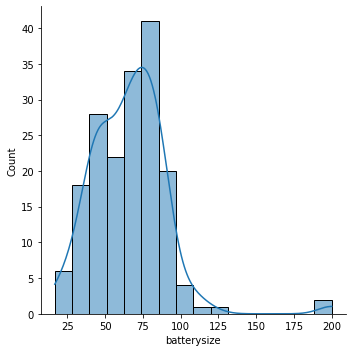

In [89]:
# distribution of battery size

sns.displot(ev['batterysize'],kde = True)

Looking at he distribution of battery sizes, batteries are most commonly 75kWh and 85kWh. There are some outliers that have a huge battery. Lets find out which EVs those are. 

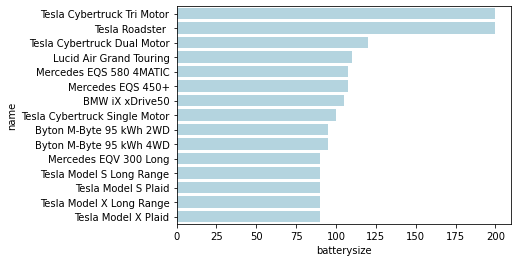

In [95]:
# EV battery size 
sorted_ev = ev.sort_values('batterysize', ascending = False)
sns.barplot(x= 'batterysize', y='name', data = sorted_ev[0:15], color = "lightblue")

We can see that the vehicles with 200 kWh size batteries are the Tesla Cybertruck and the Tesla Roadster. The batteries that these two vehicles have are almost twice as large as the competition. 

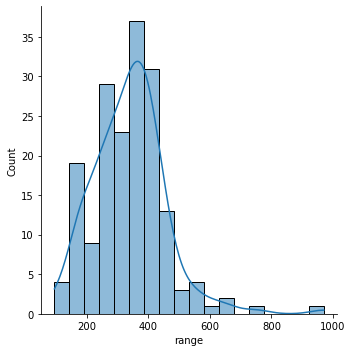

In [90]:
# distribution of range size

sns.displot(ev['range'],kde = True)

Range for the EVs centered around 390 kilometers per charge. We also see an EV rach almost 1000 kilometeres per charge. Lets take a look at which car that is. 

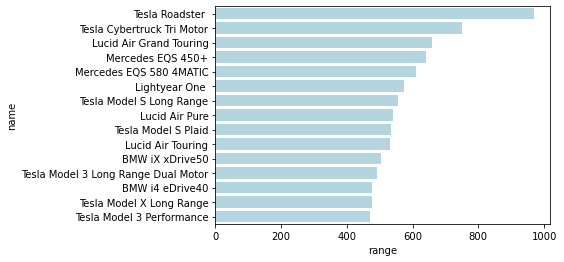

In [94]:
# EV range

sorted_ev = ev.sort_values('range', ascending = False)
sns.barplot(x= 'range', y='name', data = sorted_ev[0:15], color = "lightblue")

No coincidence that the Tesla Roadster, one of two EVs with the biggest battery size that we found earlier has the longest range. One thing to notice in this graph is how battery size is not the only factor that determines range. We can see that the Cybertruck Dula Motor, a truck with one of the biggest batteries has less range than vehicles with smaller batteries. 

To better understadn the relationship between battery size and range, we can look at the efficiency of the vehicle. An EV with alower efficiency rating will be able to travel further than a vehicle that has a high efficency rating with its energy usage provided the battery stays constant. 

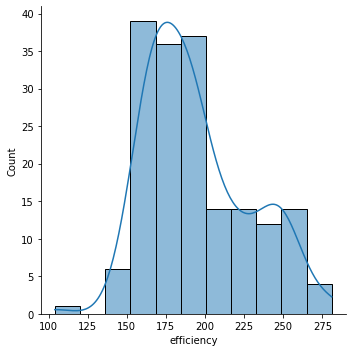

In [103]:
# First taking a look at the distribution of efficiency ratings distribution of efficiency size

sns.displot(ev['efficiency'], kde = True)

Efficiency is centered around 175 Wh/km

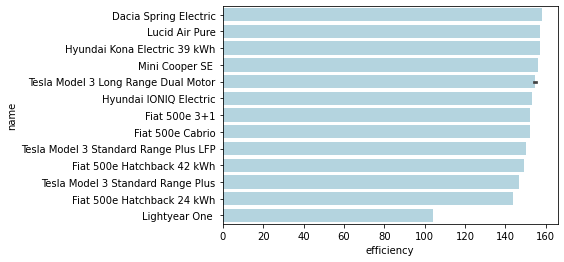

In [104]:
# EV efficiency

sorted_ev = ev.sort_values('efficiency', ascending = False)
sns.barplot(x= 'efficiency', y='name', data = sorted_ev[-15:], color = "lightblue")

These are the most efficient EVs for sale. The Lightyear One is the most efficient followed by the Fiat 500e and the Tesla model 3.

Next I want to explore the relationship between different variables. 

Firstly, I want to visualize the realtionship between battery size, range and efficiency.

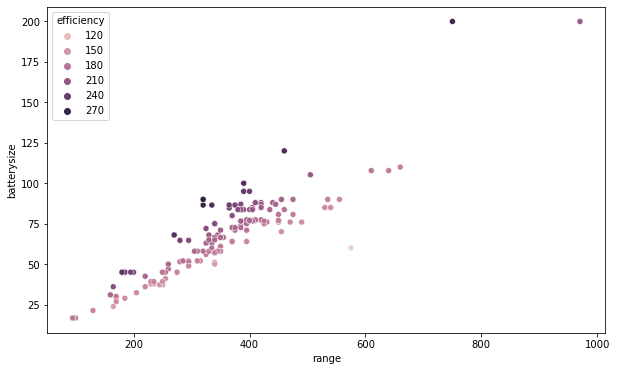

In [109]:
# batterysize vs range
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev,x='range', y='batterysize', hue = 'efficiency')

Looking at the relationship between these three variables, we can see that the battery size and range have a positive relationship whihc shows some linearity. One thing that is noticeable is the efficiency of the Lightyear One. It is able to go extremely far for the battery size. We can also see the two Teslas up top and using the findings see that the Cybertruck is drastically less efficient than the Roadster.  

Something else I want to explore is if faster EVs are more or less efficent than non sporty Evs.


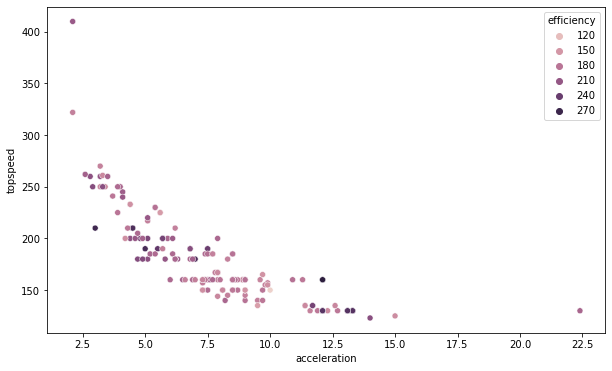

In [116]:
# topspeed acceleration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev,x='acceleration', y='topspeed', hue = 'efficiency')

We can see that efficiency of the vehicle does really have anything to do with the speed and acceleration of it. I wrongly assumed that the faster the EV the less efficient it is. We can celarly see some very inefficient cars with very slow acceleration. 

Does the type of drive have an impact on EV efficieny and range?

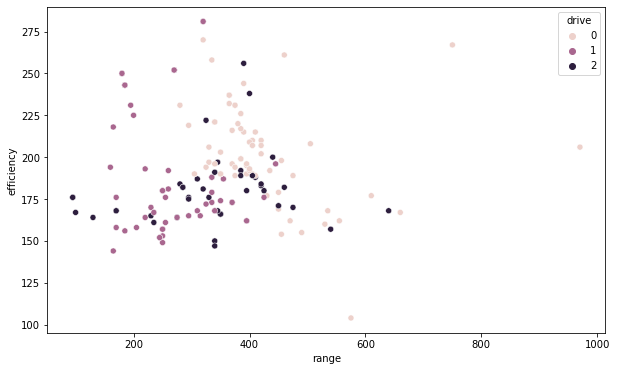

In [117]:
# Range vs Efficiency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev,x='range', y='efficiency', hue = 'drive')

All wheel drive = 0
Front wheel drive = 1
Rear wheel drive = 2

I dont think there is strong enough evidence to conclude that Drive type impacts range and efficiency

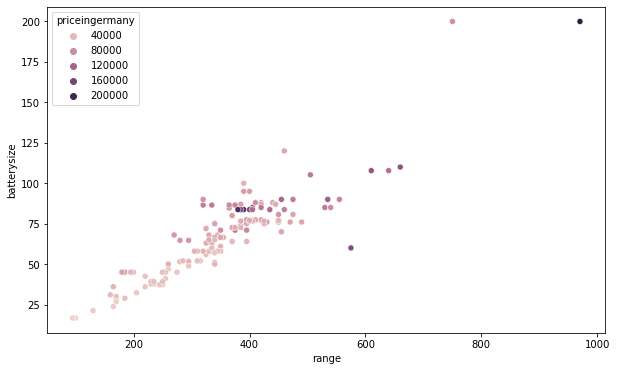

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev,x='range', y='batterysize', hue = 'priceingermany')

From this scatterplot, we can see that gerneally wehn battery size and range of an EV increases, the price increases as well. There are some noticeable overly expensive EVs with around  85 kWh batterysize and 400 km range. Lets figure out which ones those are. 

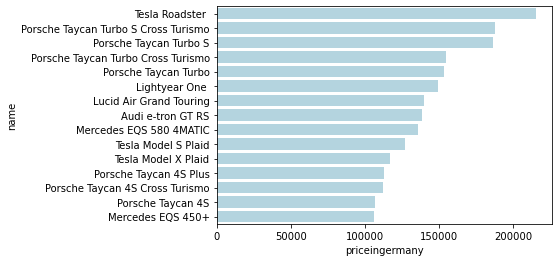

In [120]:
# EV cost
sorted_ev = ev.sort_values('priceingermany', ascending = False)
sns.barplot(x= 'priceingermany', y='name', data = sorted_ev[0:15], color = "lightblue")

In [122]:
ev[ev['name'].str.contains('Porsche')]

,name,batterysize,acceleration,topspeed,range,efficiency,fastchargespeed,drive,numberofseats,priceingermany,priceinuk
4,Porsche Taycan Turbo S,83.7,2.8,260.0,390.0,215.0,860.0,0,4.0,186336.0,138830.0
26,Porsche Taycan 4 Cross Turismo,83.7,5.1,220.0,405.0,207.0,850.0,0,4.0,93635.0,79340.0
38,Porsche Taycan Turbo,83.7,3.2,260.0,400.0,209.0,840.0,0,4.0,153016.0,115860.0
46,Porsche Taycan 4S,71.0,4.0,250.0,375.0,189.0,750.0,0,4.0,106487.0,83580.0
47,Porsche Taycan 4S Plus,83.7,4.0,250.0,435.0,192.0,910.0,0,4.0,113008.0,88193.0
121,Porsche Taycan,71.0,5.4,230.0,395.0,180.0,790.0,2,4.0,83520.0,70690.0
122,Porsche Taycan Plus,83.7,5.4,230.0,460.0,182.0,960.0,2,4.0,89244.0,74739.0
134,Porsche Taycan 4S Cross Turismo,83.7,4.1,240.0,405.0,207.0,850.0,0,4.0,111842.0,87820.0
135,Porsche Taycan Turbo Cross Turismo,83.7,3.3,250.0,385.0,217.0,800.0,0,4.0,154444.0,116950.0
136,Porsche Taycan Turbo S Cross Turismo,83.7,2.9,250.0,380.0,220.0,790.0,0,4.0,187746.0,139910.0


I am almost certain that those cars are all of the Porsche Taycans. Considering ther Range and batterysize, these cars seem to be slightly overpriced. 

Taking a look at the EVs and Price information, Which factors influence the price the most?

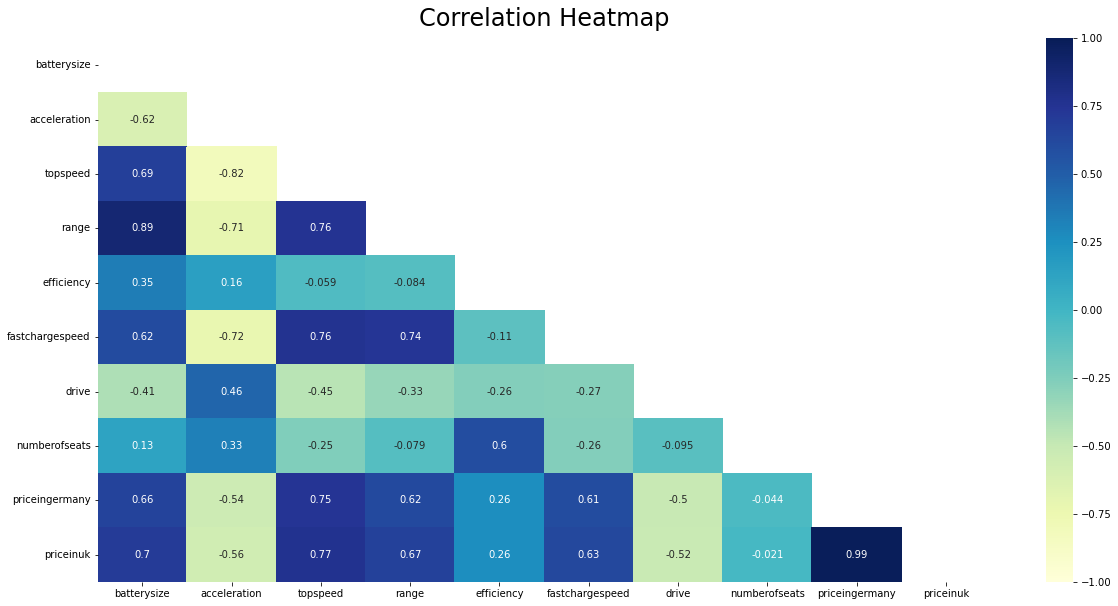

In [92]:
# heat map visualization

plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(ev.corr(), dtype=bool))
loan_map = sns.heatmap(ev.corr(method='pearson'), mask=mask, vmin = -1, vmax=1, annot = True, cmap='YlGnBu')
loan_map.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);

Taking a look at the heatmap, we can see that oddly, topspeed has the most correlation with price. This can make sense as a higher topspeed might mean a bigger battery, quicker accelleration, range, and fast charge speed, variables that seem to make a car more expensive. 